In [199]:
pwd

'C:\\Users\\DELL'

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
data= pd.read_csv("Image1.txt")

In [202]:
np.random.permutation(len(data))

array([5805, 8862, 9708, ...,   34, 9259, 1091])

In [203]:
X=data.iloc[:,0:2].values
Y=data.iloc[:,2:].values
X.shape

(9999, 2)

In [204]:
y1= Y>1
y= y1.astype(int) 
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [205]:
m=y.size
t=X


In [206]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def z(theta,x):
    assert theta.shape[1]==1
    assert theta.shape[0]==x.shape[1]
    return np.dot(x,theta)

def hypothesis(theta,x):
    return sigmoid(z(theta,x))

def cost(theta,x,y):
    assert x.shape[1]==theta.shape[0]
    assert x.shape[0] == y.shape[0] 
    assert y.shape[1] == 1
    assert theta.shape[1] == 1
    h = hypothesis(theta, x)
    one_case = np.matmul(-y.T, np.log(h))
    zero_case = np.matmul(-(1 - y).T, np.log(1 - h))
    return (one_case + zero_case) / len(x)

def gradient_descent(theta, x, y, learning_rate, regularization = 0):
    regularization = theta * regularization
    error = hypothesis(theta, x) - y
    n = (learning_rate / len(x)) * (np.matmul(x.T, error) + regularization)
    return theta - n

def minimize(theta, x, y, iterations, learning_rate, regularization = 0):
    costs = []
    for _ in range(iterations):
        theta = gradient_descent(theta, x, y, learning_rate, regularization)
        costs.append(cost(theta, x, y)[0][0])
    return theta, costs
    

In [207]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state=42)

In [208]:
X_train = np.hstack(((np.matrix(np.ones(y_train.size).reshape(y_train.size,1))),X_train))
theta0= np.zeros(X_train.shape[1]).reshape(X_train.shape[1],1)
theta0.shape
theta,costs= minimize(theta0, X_train, y_train,100,0.001,0.5)

print(costs[-1])

X_test = np.hstack(((np.matrix(np.ones(y_test.size).reshape(y_test.size,1))),X_test))


[[0.39875132]]


In [209]:
len(costs)

100

In [210]:
cots= cost(theta, X_test, y_test)
print(cots)

[[0.39892867]]


In [211]:
from sklearn import linear_model
clf1 = linear_model.LogisticRegression(C=1e5, solver='lbfgs')

In [212]:
clf1.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [213]:
preds = clf1.predict(X_test)

In [214]:
clf1.score(X_test, y_test)

1.0

In [215]:
X1 = data.iloc[:,0:2]
Y1 = data.iloc[:,-1]
y = y.ravel()

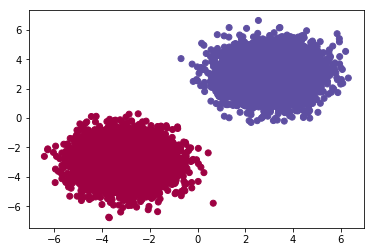

In [216]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.Spectral)
plt.show()

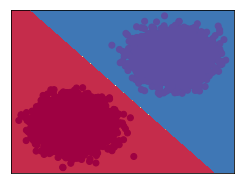

In [217]:
clf1.fit(X,y)
    
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
   
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)
  
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()